In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder ,RobustScaler
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



## Data preprocessing


In [3]:
df = pd.read_csv("/kaggle/input/bank-credit-scoring/bank.csv" , sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


In [8]:
for feature in df.select_dtypes(include=['number']):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1                             
    lower_bond=Q1-1.5*IQR
    upper_bond=Q3+1.5*IQR
    if df[(df[feature]<lower_bond)| (df[feature]>upper_bond)].any().any():
        print(feature, "Yes")
    else:
        print(feature,"No")

age Yes
balance Yes
day No
duration Yes
campaign Yes
pdays Yes
previous Yes


In [9]:
for feature in ['age','balance','duration','campaign','pdays','previous']:
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1                             
    lower_bond=Q1-1.5*IQR
    upper_bond=Q3+1.5*IQR
    df[(df[feature]>=lower_bond) & (df[feature]<=upper_bond)]

In [10]:
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


In [11]:
categorical_col = df.select_dtypes(include=['object'])
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [12]:
categorical_col.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [13]:
categorical_col.isna().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [14]:
for col in categorical_col:
    unique_values = df[col].unique()
    print(f"\n{col} unique values:")
    print("-" * 20)
    for value in sorted(unique_values):
        count = df[col].value_counts()[value]
        percentage = (count / len(df)) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")


job unique values:
--------------------
admin.: 478 (10.57%)
blue-collar: 946 (20.92%)
entrepreneur: 168 (3.72%)
housemaid: 112 (2.48%)
management: 969 (21.43%)
retired: 230 (5.09%)
self-employed: 183 (4.05%)
services: 417 (9.22%)
student: 84 (1.86%)
technician: 768 (16.99%)
unemployed: 128 (2.83%)
unknown: 38 (0.84%)

marital unique values:
--------------------
divorced: 528 (11.68%)
married: 2797 (61.87%)
single: 1196 (26.45%)

education unique values:
--------------------
primary: 678 (15.00%)
secondary: 2306 (51.01%)
tertiary: 1350 (29.86%)
unknown: 187 (4.14%)

default unique values:
--------------------
no: 4445 (98.32%)
yes: 76 (1.68%)

housing unique values:
--------------------
no: 1962 (43.40%)
yes: 2559 (56.60%)

loan unique values:
--------------------
no: 3830 (84.72%)
yes: 691 (15.28%)

contact unique values:
--------------------
cellular: 2896 (64.06%)
telephone: 301 (6.66%)
unknown: 1324 (29.29%)

month unique values:
--------------------
apr: 293 (6.48%)
aug: 633 (14.

## Data insights 

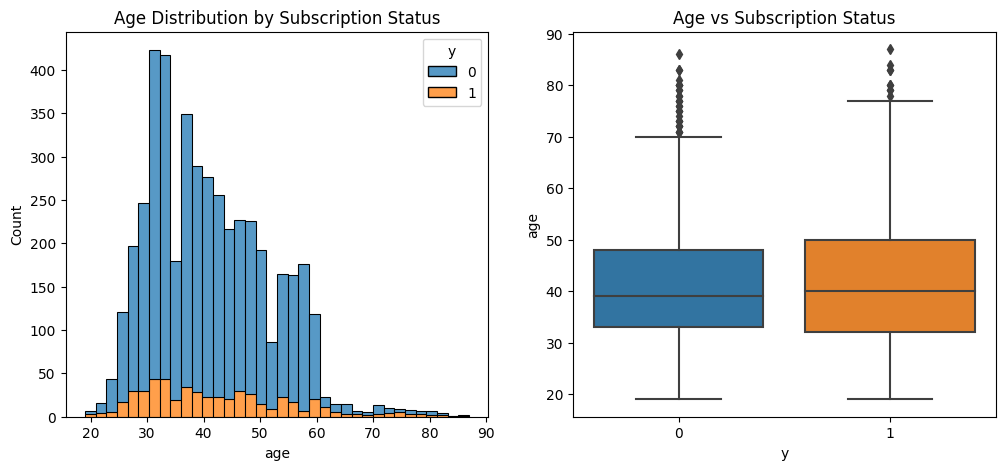


Average age by subscription status:
y
0    41.00
1    42.49
Name: age, dtype: float64


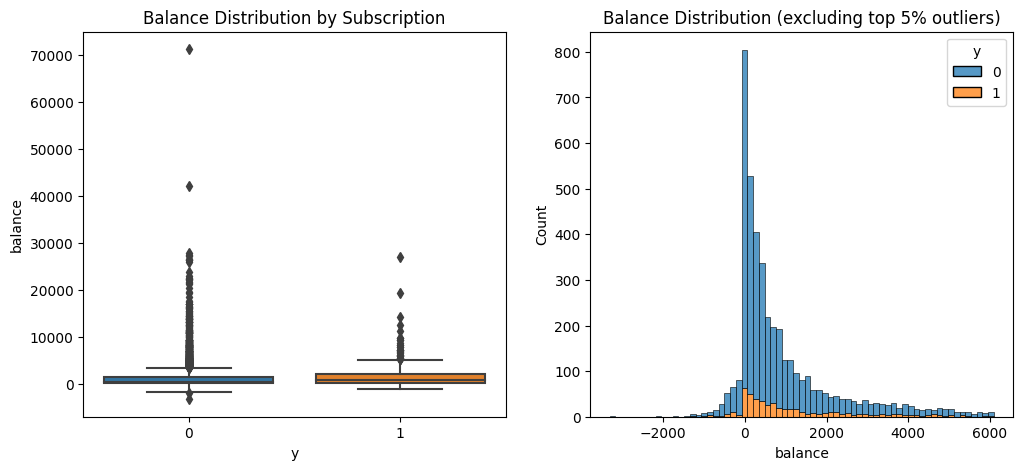


Average balance by subscription status:
y
0    1403.21
1    1571.96
Name: balance, dtype: float64


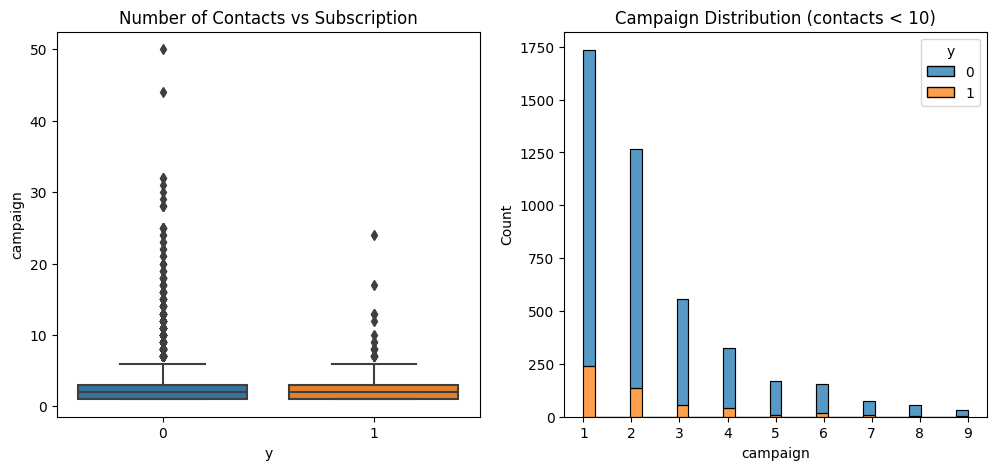

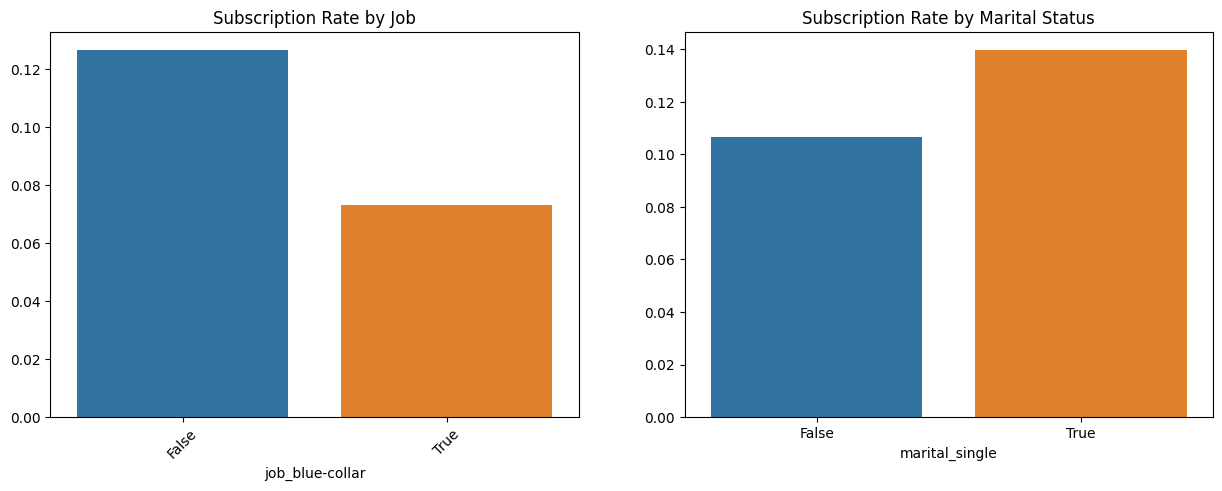

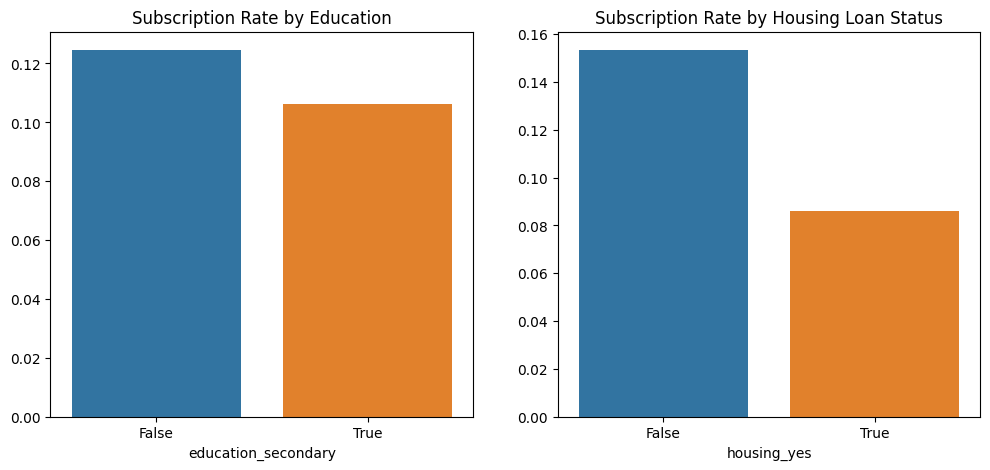


Key Insights:
--------------------------------------------------
1. Campaign Success Rate: 11.52%

2. Age Groups:
   - Average age of subscribers: 42.5 years
   - Average age of non-subscribers: 41.0 years

3. Balance:
   - Average balance of subscribers: $1571.96
   - Average balance of non-subscribers: $1403.21

4. Contact Duration:
   - Average call duration for successful campaigns: 552.7 seconds
   - Average call duration for unsuccessful campaigns: 226.3 seconds


In [15]:

# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Visualize target variable
def plot_target_distribution():
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x='y')
    plt.title('Distribution of Target Variable (Subscription)')
    plt.xlabel('Subscribed to Term Deposit')
    plt.ylabel('Count')
    plt.show()
    print("\nSubscription Rate:")
    print(df['y'].value_counts(normalize=True).round(2) * 100)

# Age distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='age', hue='y', multiple="stack")
plt.title('Age Distribution by Subscription Status')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='y', y='age')
plt.title('Age vs Subscription Status')
plt.show()
print("\nAverage age by subscription status:")
print(df.groupby('y')['age'].mean().round(2))

# Balance analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='y', y='balance')
plt.title('Balance Distribution by Subscription')
plt.subplot(1,2,2)
sns.histplot(data=df[df['balance'] < df['balance'].quantile(0.95)], x='balance', hue='y', multiple="stack")
plt.title('Balance Distribution (excluding top 5% outliers)')
plt.show()
print("\nAverage balance by subscription status:")
print(df.groupby('y')['balance'].mean().round(2))

# Campaign analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='y', y='campaign')
plt.title('Number of Contacts vs Subscription')
plt.subplot(1,2,2)
sns.histplot(data=df[df['campaign'] < 10], x='campaign', hue='y', multiple="stack")
plt.title('Campaign Distribution (contacts < 10)')
plt.show()

# Job and marital status analysis
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
job_sub_rate = df.groupby('job_blue-collar')['y'].mean().sort_values(ascending=False)
sns.barplot(x=job_sub_rate.index, y=job_sub_rate.values)
plt.title('Subscription Rate by Job')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
marital_sub_rate = df.groupby('marital_single')['y'].mean().sort_values(ascending=False)
sns.barplot(x=marital_sub_rate.index, y=marital_sub_rate.values)
plt.title('Subscription Rate by Marital Status')
plt.show()

# Education and housing loan analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
edu_sub_rate = df.groupby('education_secondary')['y'].mean().sort_values(ascending=False)
sns.barplot(x=edu_sub_rate.index, y=edu_sub_rate.values)
plt.title('Subscription Rate by Education')
plt.subplot(1,2,2)
housing_sub_rate = df.groupby('housing_yes')['y'].mean().sort_values(ascending=False)
sns.barplot(x=housing_sub_rate.index, y=housing_sub_rate.values)
plt.title('Subscription Rate by Housing Loan Status')
plt.show()

print("\nKey Insights:")
print("-" * 50)
print("1. Campaign Success Rate:", f"{(df['y']==1).mean()*100:.2f}%")
print("\n2. Age Groups:")
print("   - Average age of subscribers:", f"{df[df['y']==1]['age'].mean():.1f} years")
print("   - Average age of non-subscribers:", f"{df[df['y']==0]['age'].mean():.1f} years")
print("\n3. Balance:")
print("   - Average balance of subscribers:", f"${df[df['y']==1]['balance'].mean():.2f}")
print("   - Average balance of non-subscribers:", f"${df[df['y']==0]['balance'].mean():.2f}")
print("\n4. Contact Duration:")
print("   - Average call duration for successful campaigns:", f"{df[df['y']==1]['duration'].mean():.1f} seconds")
print("   - Average call duration for unsuccessful campaigns:", f"{df[df['y']==0]['duration'].mean():.1f} seconds")


## Modeling , after using many possible ideas , best one without overfitting in SVC with 81%

In [16]:
x = df.drop(columns=['y'] , axis=1)
y = df.y

In [17]:
scaler=RobustScaler()
x=scaler.fit_transform(x)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

y
0    88.476001
1    11.523999
Name: proportion, dtype: float64


y
0    4000
1     521
Name: count, dtype: int64

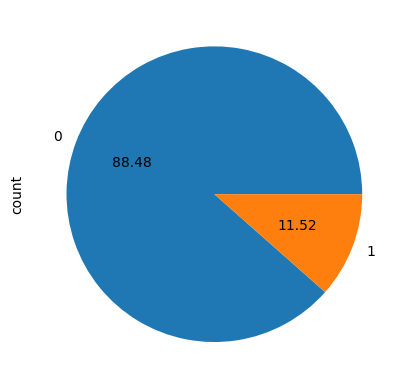

In [19]:
print(df['y'].value_counts(normalize=True) * 100)
y.value_counts().plot.pie(autopct = '%.2f')
y.value_counts()

Text(0.5, 1.0, 'Under Sampling')

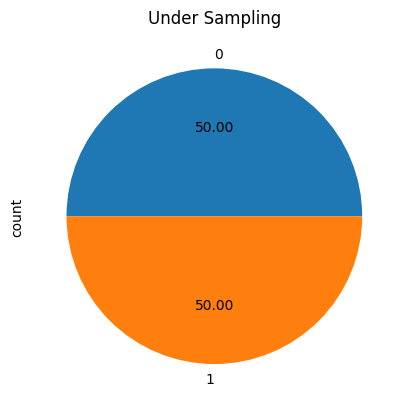

In [20]:
from imblearn.under_sampling import RandomUnderSampler


# Apply sampling
rus = RandomUnderSampler(sampling_strategy=1)
xtrain_resampled, ytrain_resampled = rus.fit_resample(xtrain, ytrain)

ax = ytrain_resampled.value_counts().plot.pie(autopct = '%.2f')
ax.set_title('Under Sampling')

In [21]:
ytrain_resampled.value_counts()

y
0    417
1    417
Name: count, dtype: int64

In [22]:
lr = LogisticRegression()
lr.fit(xtrain_resampled, ytrain_resampled)

train_accuracy = lr.score(xtrain_resampled, ytrain_resampled) * 100
test_accuracy = lr.score(xtest, ytest) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 83.33%
Test Accuracy: 80.00%


In [23]:
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [3, 5, 7],  
    'min_samples_split': [5, 10, 15],  
    'min_samples_leaf': [2, 5, 10],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier(random_state=42)
gscv = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

gscv.fit(xtrain_resampled, ytrain_resampled)

best_model = gscv.best_estimator_
train_accuracy = best_model.score(xtrain_resampled, ytrain_resampled) * 100
test_accuracy = best_model.score(xtest, ytest) * 100

print("Best Parameters:", gscv.best_params_)
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Best Parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Training Accuracy: 90.41%
Test Accuracy: 80.00%


In [24]:
param_grid_svc = {
    'C': [0.1, 1, 10],  
    'gamma': [0.1, 0.01],  
    'kernel': ['linear', 'rbf']
}

svc = SVC()
gscv_svc = GridSearchCV(svc, param_grid_svc, cv=3, scoring='accuracy', n_jobs=-1)

gscv_svc.fit(xtrain_resampled, ytrain_resampled)

best_svc_model = gscv_svc.best_estimator_
train_accuracy_svc = best_svc_model.score(xtrain_resampled, ytrain_resampled) * 100
test_accuracy_svc = best_svc_model.score(xtest, ytest) * 100

print("Best Parameters for SVC:", gscv_svc.best_params_)
print(f"Training Accuracy for SVC: {train_accuracy_svc:.2f}%")
print(f"Test Accuracy for SVC: {test_accuracy_svc:.2f}%")


Best Parameters for SVC: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Training Accuracy for SVC: 83.09%
Test Accuracy for SVC: 81.10%


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential([
    Dense(128, activation='relu', input_shape=(xtrain_resampled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use softmax for multiclass
])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain_resampled , ytrain_resampled , epochs = 50 ,batch_size=32 ,  validation_data = (xtest,ytest) , callbacks = callbacks)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5540 - loss: 2.0343 - val_accuracy: 0.6851 - val_loss: 1.3768 - learning_rate: 0.0010
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 1.1896 - val_accuracy: 0.7282 - val_loss: 1.0285 - learning_rate: 0.0010
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 1.2494 - val_accuracy: 0.7326 - val_loss: 1.3141 - learning_rate: 0.0010
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 1.0255 - val_accuracy: 0.7381 - val_loss: 0.5702 - learning_rate: 0.0010
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7865 - loss: 0.6839 - val_accuracy: 0.8442 - val_loss: 0.4358 - learning_rate: 0.0010
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.7135 - val_accuracy: 0.7470 - val_loss: 0.5217 - learning_rate: 0.0010
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.6003 - val_accuracy:

In [32]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(xtrain_resampled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use softmax for multiclass
])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain_resampled , ytrain_resampled , epochs = 50 ,batch_size=32 ,  validation_data = (xtest,ytest) , callbacks = callbacks)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5432 - loss: 1.8341 - val_accuracy: 0.6586 - val_loss: 0.8811 - learning_rate: 0.0010
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6434 - loss: 1.1125 - val_accuracy: 0.7547 - val_loss: 0.5794 - learning_rate: 0.0010
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.7977 - val_accuracy: 0.7293 - val_loss: 0.6653 - learning_rate: 0.0010
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.7161 - val_accuracy: 0.7425 - val_loss: 0.4886 - learning_rate: 0.0010
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.6440 - val_accuracy: 0.7171 - val_loss: 0.5099 - learning_rate: 0.0010
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 0.5641 - val_accuracy: 0.7315 - val_loss: 0.4598 - learning_rate: 0.0010
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7526 - loss: 0.5215 - val_accuracy:

In [36]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(128, activation='relu', input_shape=(xtrain_resampled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu' , kernel_regularizer = l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain_resampled , ytrain_resampled , epochs = 50 ,batch_size=32 ,  validation_data = (xtest,ytest) , callbacks = callbacks)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5182 - loss: 2.2828 - val_accuracy: 0.6696 - val_loss: 1.2181 - learning_rate: 0.0010
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6423 - loss: 1.2603 - val_accuracy: 0.7304 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6863 - loss: 1.1852 - val_accuracy: 0.7381 - val_loss: 0.7001 - learning_rate: 0.0010
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6966 - loss: 0.9674 - val_accuracy: 0.8287 - val_loss: 0.5998 - learning_rate: 0.0010
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7397 - loss: 0.8868 - val_accuracy: 0.7459 - val_loss: 0.5969 - learning_rate: 0.0010
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7587 - loss: 0.8257 - val_accuracy: 0.7492 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7334 - loss: 0.6783 - val_accuracy:

In [37]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu', input_shape=(xtrain_resampled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu' , kernel_regularizer = l2(0.001)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain_resampled , ytrain_resampled , epochs = 50 ,batch_size=32 ,  validation_data = (xtest,ytest) , callbacks = callbacks)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.5442 - loss: 2.3833 - val_accuracy: 0.6619 - val_loss: 0.7188 - learning_rate: 0.0010
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6257 - loss: 1.5127 - val_accuracy: 0.8343 - val_loss: 0.6629 - learning_rate: 0.0010
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6503 - loss: 1.2182 - val_accuracy: 0.8409 - val_loss: 0.6450 - learning_rate: 0.0010
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6563 - loss: 1.2301 - val_accuracy: 0.8331 - val_loss: 0.6384 - learning_rate: 0.0010
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6934 - loss: 0.9783 - val_accuracy: 0.8243 - val_loss: 0.6173 - learning_rate: 0.0010
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.8392 - val_accuracy: 0.7370 - val_loss: 0.7144 - learning_rate: 0.0010
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7487 - loss: 0.8411 - val_accuracy:

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(256, input_shape=(xtrain_resampled.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain_resampled, ytrain_resampled, epochs=50, batch_size=32, validation_data=(xtest, ytest), callbacks=callbacks)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.5734 - loss: 1.0237 - val_accuracy: 0.4486 - val_loss: 1.6013 - learning_rate: 0.0010
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6683 - loss: 0.8539 - val_accuracy: 0.3138 - val_loss: 1.3575 - learning_rate: 0.0010
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7449 - loss: 0.7362 - val_accuracy: 0.5448 - val_loss: 1.1189 - learning_rate: 0.0010
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7454 - loss: 0.7383 - val_accuracy: 0.7381 - val_loss: 0.7712 - learning_rate: 0.0010
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7645 - loss: 0.6995 - val_accuracy: 0.6939 - val_loss: 0.8135 - learning_rate: 0.0010
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7695 - loss: 0.6651 - val_accuracy: 0.7105 - val_loss: 0.8374 - learning_rate: 0.0010
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.6810 - val_accuracy

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(256, input_shape=(xtrain_resampled.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),

    
    Dense(1, activation='sigmoid')  
])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5)
]

model.compile(optimizer='AdamW', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain_resampled, ytrain_resampled, epochs=50, batch_size=64, validation_data=(xtest, ytest), callbacks=callbacks)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.5961 - loss: 0.8598 - val_accuracy: 0.7370 - val_loss: 0.8173 - learning_rate: 0.0010
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6851 - loss: 0.7922 - val_accuracy: 0.6740 - val_loss: 0.7957 - learning_rate: 0.0010
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7437 - loss: 0.7204 - val_accuracy: 0.6055 - val_loss: 0.8680 - learning_rate: 0.0010
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7571 - loss: 0.6796 - val_accuracy: 0.6464 - val_loss: 0.8084 - learning_rate: 0.0010
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7688 - loss: 0.6650 - val_accuracy: 0.7470 - val_loss: 0.6381 - learning_rate: 0.0010
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7639 - loss: 0.6507 - val_accuracy: 0.7072 - val_loss: 0.6959 - learning_rate: 0.0010
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7522 - loss: 0.6607 - val_accuracy